# Formalia:

Please read the [assignment overview page](https://github.com/SocialComplexityLab/socialgraphs2021/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc.), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday November the 2nd, 2021 at 23:59. Hand in your IPython notebook file (with extension `.ipynb`) via http://peergrade.io/

### Overview

This year's Assignment 2 is all about analyzing the network of The Legend of Zelda: Breath of the Wild.

Note that this time I'm doing the exercises slightly differently in order to clean things up a bit. The issue is that the weekly lectures/exercises include quite a few instructions and intermediate results that are not quite something you guys can meaningfully answer. 

Therefore, in the assignment below, I have tried to reformulate the questions from the weekly exercises into something that is (hopefully) easier to answer. *Then I also note which lectures each question comes from*; that way, you can easily go back and find additional tips & tricks on how to solve things 😇


----

# Part 0: Building the network 

To create our network, we downloaded the Zelda Wiki pages for all characters in BotW (during Week 4) and linked them via the hyperlinks connecting pages to each other. To achieve this goal we have used regular expressions!

> * Explain the strategy you have used to extract the hyperlinks from the Wiki-pages, assuming that you have already collected the pages with the Zelda API.
> * Show the regular expression(s) you have built and explain in details how it works.

**Answer:**

This is the code that was built to extract the hyperlinks from the Wiki-pages. The code is up for show to make it easier to explain how the links were extracted. 

<img src="code.png" style="width:550px;height:600px"/>

First, we found the path on the computer that directs us the the Zelda texts, that we need to open later on.

Then there were two regular expression patterns made to catch the names of the characters. The regular expressions  will be explained in details below.

Then we got the csv file from: https://github.com/SocialComplexityLab/socialgraphs2021/blob/main/files/ZeldaBotW_nodes_w_attributes_enriched.csv, that the teacher provided us with. The csv file is read as a DataFrame (df_characters), and the data is devide on ";", that splits up the data into names, roles, races and genders of each character. The frist 4 rows of the DataFrame is shown as an example below.

<img src="dataframe.png" style="width:405px;height:300px"/>

Next, we looped through the name of each chararcter in the DataFrame and opened and read the files that had already been collected with the Zelda API. This data was saved as a variable named "node_description".

The function "findall" was used, with both the patterns, first for the pattern with the curly brackets and then for the pattern with the square brackets. The variable "node_description" was also put in to the "findall" function, that returns all the characters names/links that existed in the Zelda text (node_description).

Finally, we looped through all of the names/links we had collected with the "findall" function. For the links we found with the curly brackets, we had to split on "|", because some of the names/links that were extracted with this pattern include the string "link" in it and we only want to keep the actual name and not the "link" part of it. An example of this is shown here.

<img src="link.png" style="width:300px;height:30px"/>

In the same loop we make a check point, that checks if the name/link that was extracted form the findall function is an actual name and exsites in the original DataFram (df_charactes). If so, we add it to a list of tuples with the orignilar character name and all the other names he connects to.

The same is then done for the pattern with the square brackets, but without the split on "|", because it does not apply to that pattern, since the names/links we extract with the pattern does not include the string "link". 

An example of the output of the list of tuples, is shown here.

<img src="tuple.png" style="width:250px;height:60px"/>

And there we have the hyperlinks!

----

As briefly stated above, we had to make two regular expression patterns to extract all the chararcters names from the Zelda text. Now we are going to explain in detail how they work. 

The first pattern was made to extract names/links that are inside double curly brackets. The pattern is shown here: 

<img src="curly_brackets.png" style="width:500px;height:30px"/>

We know that the name of character that we want to extract is on either one of those forms:

* **{{Term|BotW|name of character|link}}**
* **{{Plural|BotW|name of character|link}}**


We started by making **\\{\\{** and **\\}\\}** on both ends of the pattern, to indicate that we want to extract something inside a double curly barcket.

This term: **(Term|Plural)** tells us to find either Term or Plural from the Zelda text but we put **?:** in front to make sure that we do not capture it. 

Then we put this expression: **|BotW\|** because we know that what comes after eiter Term or Plural is always |BotW|.

We then set **(.*?)** which implies that we want to capture everything that is inside there, which is "name of character|link".

Finally, the Zelda text that we are extracting the links from, also contains sentences on the same format that our pattern catches "{{Term|BotW|name of character}}", but the "|link" is not included after the character name. Those are not actual names/links we want to catch. We want the names/links that includes "|link" afterwards. Therefore we decided to extract the name and the link together: name of character|link so we know that we are catching the atctual name/link that we want. As talked about above, in our code we end up splitting the "name of character|link" on "|", so we can catch only the character name and not the "|link" that comes afterwards.

. . . .

The next pattern was made to extract names/link that are inside double square brackets. The pattern is shown here:

<img src="square_brackets.png" style="width:350px;height:30px"/>

We know that the name of character that we want to extracted is one of those forms:

* **[[name of character]]**
* **[[name of character|Zelda]]**

We started by making **\\[\\[**  and **\]\]** on both ends of the pattern, to indicate that we want to extract something inside a double square barcket.

Again, we make **(.*?)** to indicate that we want everything inside the square brackets.

Then we have to take care of the second condition: [[name of character|Zelda]], we put **\|.*?** to look for a bar in the text, but then we add another **?** after to indicate that there could be a bar but there also could not be a bar.

Finally, we put **?:** to make sure that we do not catch the word that comes after the bar.

# Part 1: Network visualization and basic stats

Visualize the network (from lecture 5) and calculate stats (from lecture 4 and 5). For this exercise, we assume that you've already generated the BotW network and extracted the giant connected component. Use the GCC to report the results.

_Exercise 1a_: Stats (see lecture 4 and 5 for more hints)

> * What is the number of nodes in the network? 
> * What is the number of links?
> * Who is the top connected character in BotW? (Report results for the in-degrees and out-degrees). Comment on your findings. Is this what you would have expected?
> * Who are the top 5 most connected allies (again in terms of in/out-degree)? 
> * Who are the top 5 most connected enemies -- bosses included -- (again in terms of in/out-degree)?
> * Plot the in- and out-degree distributions. 
>   * What do you observe? 
>   * Can you explain why the in-degree distribution is different from the out-degree distribution?
> * Find the exponent of the degree distribution (by using the `powerlaw` package) for the in- and out-degree distribution. What does it say about our network?
> * Compare the degree distribution of the undirected graph to a *random network* with the same number of nodes and probability of connection *p*. Comment your results.

_Exercise 1b_: Visualization (see lecture 5 for more hints)

> * Create a nice visualization of the total (undirected) network:
>   * Color nodes according to the role;
>   * Scale node-size according to degree;
>   * Get node positions based on the Force Atlas 2 algorithm;
>   * Whatever else you feel like that would make the visualization nicer.
> * Describe the structure you observe. Can you identify nodes with a privileged position in the network? Do you observe chains of connected nodes? Do you see any interesting group of nodes (can you guess who's involved)?

**Answer:**

We start of by getting the hyperlinks from the Zelda text and extract the giant connected component.

In [1]:
import os
import pandas as pd
import re
import networkx as nx
import collections
import matplotlib.pyplot as plt
import powerlaw
import numpy as np
from fa2 import ForceAtlas2
from matplotlib.lines import Line2D
import community
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.text import Text
import nltk
import math
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import wordcloud

In [2]:
# get the hyperlinks
def get_hyperlinks(df_characters):
    script_path = os.getcwd()
    folder = 'Description/'
    path = os.path.join(script_path,folder)
    
    pattern_curly = '\{\{(?:Term|Plural)\|BotW\|(.*?)\}\}'
    pattern_square = '\[\[(.*?)(?:\|.*?)?\]\]'

    hyperlinks = []

    for char in df_characters.Name.values:
        # open the zelda description files
        with open(path + char + '.txt', 'r') as f:
            node_description = f.read()
        
        links_curly = re.findall(pattern_curly, node_description)
        links_square = re.findall(pattern_square, node_description)


        # For pattern including curly brackets
        for name in links_curly:
            name = name.split('|')
            if "link" in name:
                 # check if character is in the char list
                #print(name)
                if name[0] in df_characters.Name.values:
                    hyperlinks.append((char, name[0]))
                
        # For pattern including square brackets  
        for name in links_square:
            # check if character is in the char list
            if name in df_characters.Name.values:
                hyperlinks.append((char, name))
                
    return hyperlinks

In [3]:
df_characters = pd.read_csv('zelda_ch.csv', delimiter=';')
hyperlinks = get_hyperlinks(df_characters)

In [4]:
# Make a network
zelda_network = nx.DiGraph()

# Add egdes
zelda_network.add_edges_from(hyperlinks)

# Discard isolated nodes
zelda_network.remove_nodes_from(list(nx.isolates(zelda_network)))

In [5]:
# Extract the giant connected component
gcc = zelda_network.subgraph(max(nx.weakly_connected_components(zelda_network), key=len))

**Answer 1a: Stats**

**What is the number of nodes in the network?**

In [6]:
nodes = len(gcc.nodes)
print('The number of nodes in the network are: ', nodes)

The number of nodes in the network are:  530


**What is the number of links?**

In [7]:
edges = len(gcc.edges)
print('The number of links in the network are: ', edges)

The number of links in the network are:  1623


**Who is the top connected character in BotW? (Report results for the in-degrees and out-degrees). Comment on your findings. Is this what you would have expected?**

In [8]:
top_indegree = sorted(dict(gcc.in_degree()).items(), key=lambda item: item[1], reverse=True)
print('The top connected character in BotW in terms of in-degree is: ', top_indegree[0])

The top connected character in BotW in terms of in-degree is:  ('Link', 395)


* When observing the in-degree, the top connected character in BotW is Link, with 395 connections. It supports the fact that Link is the main character in Zelda BotW. This is reasonable, since it might be noteworthy for the minor characters to interact with the main character, and therefore refer to the main character on their page.

In [9]:
top_outdegree = sorted(dict(gcc.out_degree()).items(), key=lambda item: item[1], reverse=True)
print('The top connected character in BotW in terms of out-degree is: ', top_outdegree[0])

The top connected character in BotW in terms of out-degree is:  ('Traysi', 14)


* When observing the out-degree, the top connected character in BotW is Traysi, with 14 connections. That makes sense because Traysi is a journalist, so she might be connected to many ohter characters and therefore those characters are mentioned in Traysi´s Wiki-page.

**Who are the top 5 most connected allies (again in terms of in/out-degree)?**

In [10]:
# DataFrame with only allies
allies = df_characters[df_characters['Role'] == 'Ally']

# Get the links for allies
ally_links = get_hyperlinks(allies)

# Make a new network, only with allies
ally_network = nx.DiGraph()
ally_network.add_edges_from(ally_links)
ally_network.remove_nodes_from(list(nx.isolates(ally_network)))

# Extract the giant connected component from the ally network
gcc_ally = ally_network.subgraph(max(nx.weakly_connected_components(ally_network), key=len))

In [11]:
top_indegree_ally = sorted(dict(gcc_ally.in_degree()).items(), key=lambda item: item[1], reverse=True)
print('The top 5 most connectes allies in terms of in-degree are: ',top_indegree_ally[:5])

The top 5 most connectes allies in terms of in-degree are:  [('Link', 339), ('Hylia', 67), ('Riju', 23), ('Princess Zelda', 20), ('Mipha', 17)]


In [12]:
top_outdegree_ally = sorted(dict(gcc_ally.out_degree()).items(), key=lambda item: item[1], reverse=True)
print('The top 5 most connectes allies in terms of out-degree are: ',top_outdegree_ally[:5])

The top 5 most connectes allies in terms of out-degree are:  [('Traysi', 12), ('Genli', 10), ('Dorian', 9), ('Link', 8), ('Kass', 8)]


**Who are the top 5 most connected enemies -- bosses included -- (again in terms of in/out-degree)?**

In [13]:
# DataFrame with only enemies
enemies = df_characters.loc[(df_characters['Role'] == 'Boss') | (df_characters['Role'] == 'Enemy')]

# Get the links for enemies
enemies_links = get_hyperlinks(enemies)

# Make a new network, only with enemies
enemies_network = nx.DiGraph()
enemies_network.add_edges_from(enemies_links)
enemies_network.remove_nodes_from(list(nx.isolates(enemies_network)))

# Extract the giant connected component from the enemies network
gcc_enemies = enemies_network.subgraph(max(nx.weakly_connected_components(enemies_network), key=len))

In [14]:
top_indegree_enemies = sorted(dict(gcc_enemies.in_degree()).items(), key=lambda item: item[1], reverse=True)
print('The top 5 most connected enemies in terms of in-degree are: ', top_indegree_enemies[:5])

The top 5 most connected enemies in terms of in-degree are:  [('Calamity Ganon', 17), ('Lizalfos', 9), ('Bokoblin', 9), ('Stalizalfos', 8), ('Stone Talus', 8)]


In [15]:
top_outdegree_enemies = sorted(dict(gcc_enemies.out_degree()).items(), key=lambda item: item[1], reverse=True)
print('The top 5 most connected enemies in terms of in-degree are: ', top_outdegree_enemies[:5])

The top 5 most connected enemies in terms of in-degree are:  [('Stalizalfos', 11), ('Lizalfos', 10), ('Silver Lizalfos', 10), ('Blue Lizalfos', 9), ('Ice-Breath Lizalfos', 9)]


**Plot the in- and out-degree distributions.**

**What do you observe?**

**Can you explain why the in-degree distribution is different from the out-degree distribution?**

**In-degree**

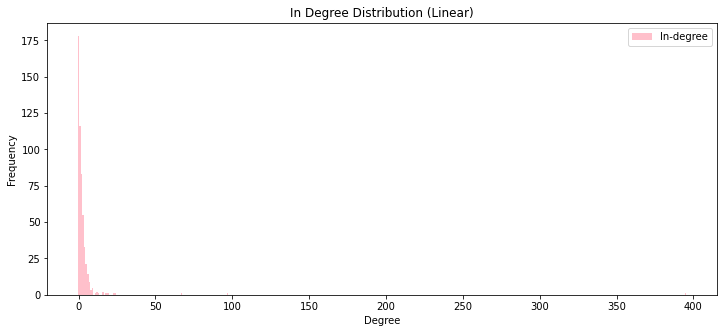

In [16]:
# Plotting the in-degree distribution
degree = sorted([d for n, d in gcc.in_degree()])
degree_count = collections.Counter(degree)
deg, count = zip(*degree_count.items())

# With linear axes
plt.figure(figsize=(12,5))
plt.bar(deg, count, width=1, color="pink")
plt.title("In Degree Distribution (Linear)")
plt.ylabel("Frequency")
plt.xlabel("Degree")
plt.legend(['In-degree'])

plt.show()

* The two plots above show the in-degree distribution for Zelda BotW, both with linear and log-log axes. From the plots, we can see that the most common in-degree is zero, that means that most characters have a small number or a zero number of incomming links. This could indicate that many characters are only "small characters" and not important to other characters in Zelda. This makes sense, becuase games are often about the main characters and the small characters arise in the game only to be killed or cause a conflict, and are therefore not a part of the rest of the game.

**Out-degree**

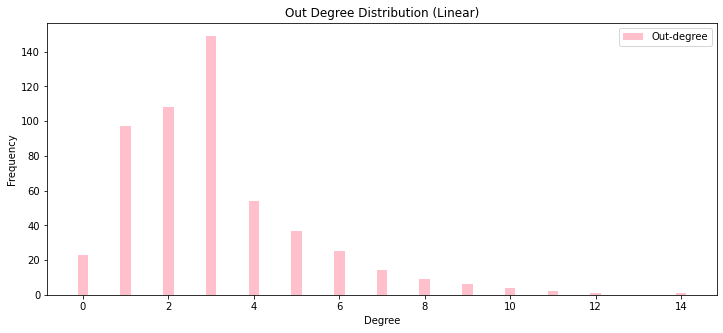

In [17]:
# Plotting the out-degree distribution
degree = sorted([d for n, d in gcc.out_degree()])
degree_count = collections.Counter(degree)
deg, count = zip(*degree_count.items())

# With linear axes
plt.figure(figsize=(12,5))
plt.bar(deg, count, width=0.25, color="pink")
plt.title("Out Degree Distribution (Linear)")
plt.ylabel("Frequency")
plt.xlabel("Degree")
plt.legend(['Out-degree'])

plt.show()

* The plots above show the out-degree distribution for Zelda BotW, both with linear and log-log axes. We can see on the upper plot that the tail of the distribution is much shorter than it was in the in-degree. The Wiki-pages with high out-degree are usually characters that have a high impact on many other characters, for example the journalist Traysi, who has the highest out-degree of all the characters.

**Comparing the degrees**

* When comparing the difference bewteen in- and out-degree, we could expect that smaller characters have less in-degrees than out-degrees. Like mentioned earlier, small characters are less likely to appear in the Wiki-pages of the bigger charactes. However, the small characters will most likely be mentioning the big characters on their Wiki-pages. We expect that smaller character have a few or no in-degrees because they are irrelevant in the Zelda game, but they will have out-degrees to other characters. 

* It also seems that the Wiki-pages tend to focus on the highlights of a character's relationships rather then listing all of them, hece why there are fewer pages with a very large out-degree, which explanes why the tail of the distribution of the out-degree is much shorter than the tail of the in-degree. 

**Find the exponent of the degree distribution (by using the powerlaw package) for the in- and out-degree distribution. What does it say about our network?**

In [18]:
in_degree_sequence = sorted([d for n, d in gcc.in_degree()])
powerlaw.Fit(in_degree_sequence, discrete=True).alpha

Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


2.500237406378364

In [19]:
out_degree_sequence = sorted([d for n, d in gcc.out_degree()])
powerlaw.Fit(out_degree_sequence, discrete=True).alpha

Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


3.0907224955673627

\begin{align}
    p_k  \sim k^{-γ} \tag{1}\\
    log(p_k) \sim -γlog(k) \tag{2}  
\end{align}

* Equation 1 is called a power law distribution, where $γ$ is the exponent of its degree distribution. When taking the logarithm of equations 1, we obtain equation 2. This shows that the exponent $γ$ is the slope of the line k and therefore it is expected that the $log(p_k)$ is depentent linearly on $log(k)$. A scale-free network is a network whose degree distribution follows a power law. [Ref: Networksciencebook](http://networksciencebook.com/chapter/4#power-laws)
 

* If the exponent $γ$ is between 2 and 3, the network is considered a scale-free network. In our case the exponent $γ$ is 2,50 and therefore we have a scale-free network. 

**Compare the degree distribution of the undirected graph to a random network with the same number of nodes and probability of connection p. Comment your results.**

In [20]:
N = gcc.size()
N_edges = len(gcc.edges())
p = N_edges/(N*(N-1))

# Create the random network
random_network = nx.fast_gnp_random_graph(N, p, directed=True)

In [21]:
# Find the in-degree for random network
in_degree_random = sorted([random_network.in_degree(i) for i in random_network.nodes()])
in_degree_count_random = collections.Counter(in_degree_random)
in_deg_rand, in_count_rand = zip(*in_degree_count_random.items())

# Find the in-degree for gcc
in_degree_gcc = sorted([gcc.in_degree(i) for i in gcc.nodes()])
in_degree_count_gcc = collections.Counter(in_degree_gcc)
in_deg_gcc, in_count_gcc = zip(*in_degree_count_gcc.items())

In [22]:
# Find the out-degree for random network
out_degree_random = sorted([random_network.out_degree(i) for i in random_network.nodes()])
out_degree_count_random = collections.Counter(out_degree_random)
out_deg_rand, out_count_rand = zip(*out_degree_count_random.items())

# Find the out-degree for gcc
out_degree_gcc = sorted([gcc.out_degree(i) for i in gcc.nodes()])
out_degree_count_gcc = collections.Counter(out_degree_gcc)
out_deg_gcc, out_count_gcc = zip(*out_degree_count_gcc.items())

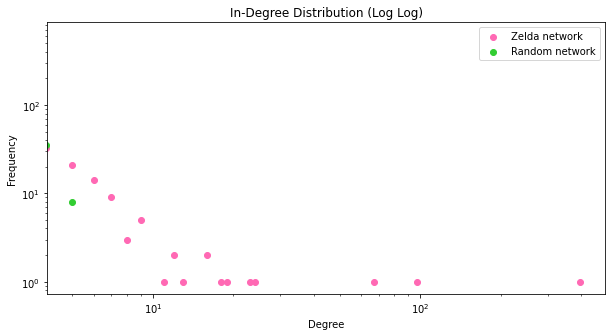

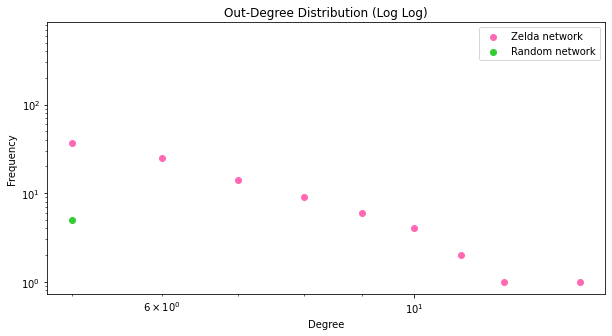

In [23]:
# Plot the in-degree distribution
fig, ax = plt.subplots(figsize = (10,5))
plt.scatter(in_deg_gcc, in_count_gcc, color='hotpink')
plt.scatter(in_deg_rand, in_count_rand, color='limegreen')
plt.xscale('log')
plt.yscale('log')
plt.title('In-Degree Distribution (Log Log)')
plt.ylabel('Frequency')
plt.xlabel('Degree')
plt.legend(['Zelda network','Random network'])

# Plot the out-degree distribution
fig, ax = plt.subplots(figsize = (10,5))
plt.scatter(out_deg_gcc, out_count_gcc, color='hotpink')
plt.scatter(out_deg_rand, out_count_rand, color='limegreen')
plt.xscale('log')
plt.yscale('log')
plt.title('Out-Degree Distribution (Log Log)')
plt.ylabel('Frequency')
plt.xlabel('Degree')
plt.legend(['Zelda network','Random network'])
plt.show()

In [24]:
print('The maximum in-degree of the random network: ', max(in_deg_rand))
print('The maximum in-degree of the Zelda network: ', max(in_deg_gcc))
print('-----')
print('The maximum out-degree of the random network: ', max(out_deg_rand))
print('The maximum out-degree of the Zelda network: ', max(out_deg_gcc))

The maximum in-degree of the random network:  5
The maximum in-degree of the Zelda network:  395
-----
The maximum out-degree of the random network:  5
The maximum out-degree of the Zelda network:  14


* The two plots above show the difference bewteen the degree distribution of a random network and degree distribution of the gcc Zelda network. A significant difference can be observed when looking at the plots of the maximum in- and out-degree.

* As mentioned before, the Zelda network is more like a scale-free network than a random one. The maximum in- and out-degrees of the Zelda network are very different from each other, while the maximum in- and out-degree of the random network is more or less the same. 

* In the Zelda network there is a a large number of small degree nodes, which are mostly missing from the random network. There is also a lack of high degree nodes in the random network in comparison to the Zelda netwotk.

**Answer 1b: Visualization**

**Create a nice visualization of the total (undirected) network:**
* **Color nodes according to the role;**
* **Scale node-size according to degree;**
* **Get node positions based on the Force Atlas 2 algorithm;**
* **Whatever else you feel like that would make the visualization nicer.**

In [25]:
# Get node positions based on the Force Atlas 2 algorithm
forceatlas2 = ForceAtlas2(
                          # Behavior alternatives
                          outboundAttractionDistribution=False,  # Dissuade hubs
                          edgeWeightInfluence=0.5,
                          # Performance
                          jitterTolerance=0.2, # Tolerance
                          barnesHutOptimize=True,
                          barnesHutTheta=0.6,
                          # Tuning
                          scalingRatio=5.0,
                          strongGravityMode=True,
                          gravity=1,
                          # Log
                          verbose=False)

In [26]:
gcc_undirected = gcc.to_undirected()

In [27]:
degrees = [val for node,val in gcc_undirected.degree()]

# Scale node size according to degree
node_size = [i * 1.6 for i in degrees]

In [28]:
# Get color nodes according to the role
enemy_df = df_characters.loc[(df_characters['Role'] == 'Enemy')]
ally_df = df_characters.loc[(df_characters['Role'] == 'Ally')]
boss_df = df_characters.loc[(df_characters['Role'] == 'Boss')]

color_roles = []
for node in gcc_undirected.nodes():
    if node in enemy_df.Name.values:
        color_roles.append('#00FF00')
    elif node in ally_df.Name.values:
        color_roles.append('#FF0000')
    elif node in boss_df.Name.values:
        color_roles.append('#00FFFF')

In [29]:
edge_colors = []
for u, v in gcc_undirected.edges():
    edge_colors.append("#ffd0d0")

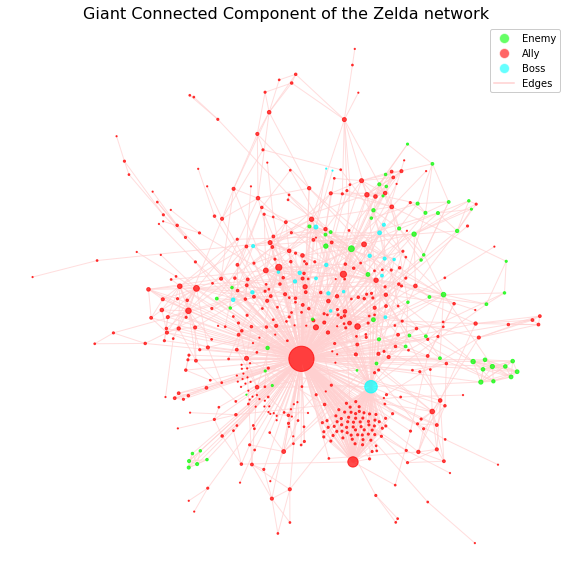

In [30]:
f = plt.figure(figsize=(10,10))
#ax = plt.gca()

# Create a legend for the different colors
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Enemy',
                          markerfacecolor="#00FF00", markersize=10, alpha=0.6),
                   Line2D([0], [0], marker='o', color='w', label='Ally',
                          markerfacecolor="#FF0000", markersize=10, alpha=0.6),
                   Line2D([0], [0], marker='o', color='w', label='Boss',
                          markerfacecolor="#00FFFF", markersize=10, alpha=0.6),
                   Line2D([0], [0], color="#ffd0d0", label='Edges')]

positions = forceatlas2.forceatlas2_networkx_layout(gcc_undirected, pos=None, iterations=50)
nodes = nx.draw_networkx_nodes(gcc_undirected, positions, node_size=node_size, node_color=color_roles, alpha=0.7)
edges = nx.draw_networkx_edges(gcc_undirected, positions, edge_color=edge_colors,alpha=0.7)

plt.axis('off')
plt.title("Giant Connected Component of the Zelda network", fontsize=16)

plt.legend(handles=legend_elements, facecolor='white', framealpha=1)

plt.show()

**Describe the structure you observe. Can you identify nodes with a privileged position in the network? Do you observe chains of connected nodes? Do you see any interesting group of nodes (can you guess who's involved)?**

* The figure above show a visualization of the Zelda network (giant connected component). The different colors of the nodes on the figures present different roles of the characters. The green color represent the enemies, the red represents the allies, the blue represent the bosses and finally the edges are in pink. When looking at the colors, we can see that allies or the red nodes are the majority of the characters.

* We can se that the blue nodes tend to be around the same area, which indicates that they have a special relation bewteen them, and the same applies for the green nodes. This implies that different roles are grouped together.

* The size of nodes represent the degree or the number of connections each character has. We can see one big node in the middle of the network, which would of course represents Link, who is the main character of Zelda.

# Part 2: Word-clouds

Create your own version of the word-clouds (from lecture 7). For this exercise we assume you know how to download and clean text from the ZeldaWiki pages.

Here's what you need to do:
> * Create a word-cloud for each race of the [five champions of Hyrule](https://zelda.fandom.com/wiki/Champions) (i.e. Hylian, Zora, Goron, Gerudo, and Rito) according to either TC-IDF. Feel free to make it as fancy as you like. Explain your process and comment on your results.

**Answer:**

* We use this part to distinguish characters that contain blank space in their name

In [31]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


# This part is used because the .txt files of the characters contain spaces in between words
normal_name = []
comp_name = []
list_of_names = df_characters['Name'].tolist()
for name in list_of_names:
    if ' ' in name:
        comp_name.append(name)
    else:
        normal_name.append(name)



# CREATE LIST OF CHARACTERS
race_list = list(set(df_characters['Race']))

* After we have a clean text for each page, we tokenize

In [32]:
# Creating tokenized dictionary for every race
#removing punctuation, creating tokens, setting to lowercase, removing stopwords, lemmatizing etc...
def get_dict_of_races(df_characters, column):
    dict_of_races = {}
    for race in race_list:
        script_path = os.getcwd()
        folder = 'characters_clean_text/'
        path = os.path.join(script_path,folder)
    
        final_list = []
        df = df_characters[df_characters[column] == race] # svo ég þurfi ekki að loopa í gegnum allt, heldur bara þegar name samsvarar raceinu sem ég er staðsett í
        for char in df['Name']:
        
            with open(path + char + '.txt', 'r', encoding="utf-8") as file:
                content = file.read()
        
            char = char.replace(' ','_')    
            pattern = r'\=+[\w\s]+\=+'
            new_line_pattern = r'\\n'
            new_content = re.sub(pattern, '', content)
            new_content = re.sub(new_line_pattern, ' ', content)
    
        
            for name in comp_name:
                new_content = new_content.replace(name, "")
        
            tk = RegexpTokenizer(r'\w+') 
            token_content = tk.tokenize(new_content)
    
        
            words = [word for word in token_content if word not in normal_name]
    
        
            words = [word for word in words if word not in stopwords.words('english')]
    
        
            words = [word.lower() for word in words]
    
            wnl = WordNetLemmatizer()
            words = [wnl.lemmatize(word) for word in words]
        
            final_list.extend(words) 
        dict_of_races[race] = final_list 
    return dict_of_races

In [33]:
column = 'Race'
dict_of_races = get_dict_of_races(df_characters, column)

* Then we Convert the dictionary to a DataFrame

In [34]:
#create dataframe from dictionary to use for the wordcloud
dict_df = pd.DataFrame({ key:pd.Series(value) for key, value in dict_of_races.items() })
dict_df = dict_df.T

# merge all columns with strings to one column with all the strings
df_w = pd.Series(dict_df.fillna('').values.tolist()).str.join(' ')
df_w = df_w.to_frame()

df_w['race'] = race_list
df_w = df_w.rename(columns={0: 'description'})

* And finally, apply function for wordcloud plots

In [35]:
# Define wordcloud function to use for each of the races
def show_wordcloud(df_w, title):
    text = ' '.join(df_w['description'].astype(str).tolist())   #
    #crete list of strings
    stopwords = set(wordcloud.STOPWORDS) #set stopwords, taken from library
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,
        max_font_size=100, max_words=100, background_color="white").generate(text)
    #nr of words included, size of biggest word etc..
    plt.figure(figsize=(10,6), frameon=True)
    plt.imshow(fig_wordcloud, interpolation="bilinear")  
    plt.axis('off')
    plt.title(title, fontsize=15)
    plt.show()

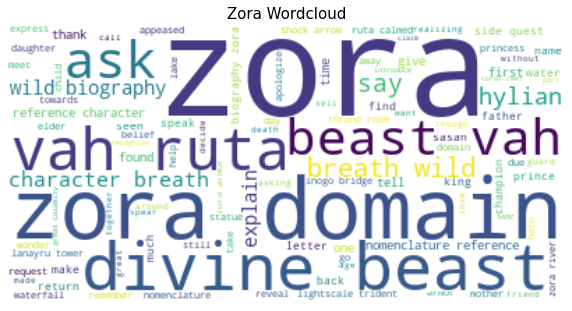

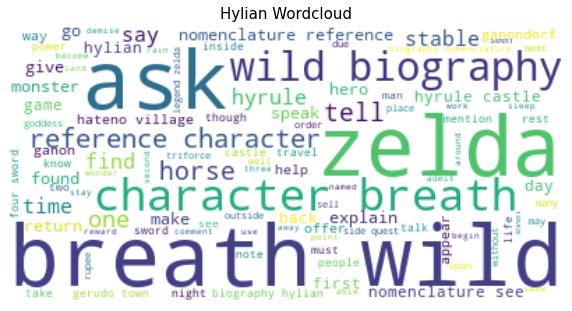

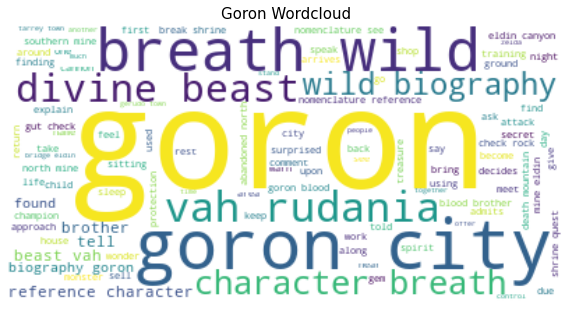

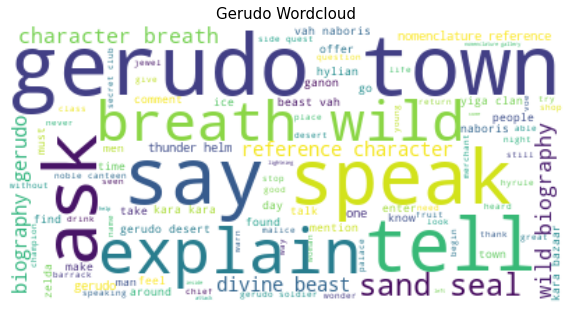

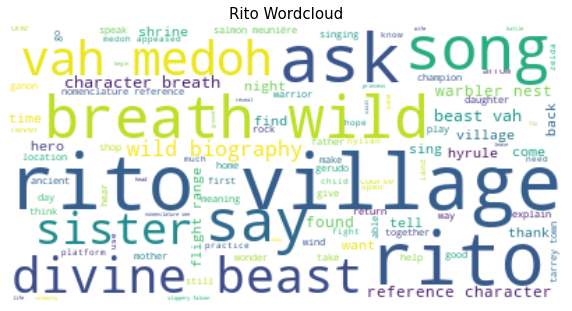

In [36]:
show_wordcloud(df_w[df_w.race=='Zora'], "Zora Wordcloud")
show_wordcloud(df_w[df_w.race=='Hylian'], "Hylian Wordcloud")
show_wordcloud(df_w[df_w.race=='Goron'], "Goron Wordcloud")
show_wordcloud(df_w[df_w.race=='Gerudo'], "Gerudo Wordcloud")
show_wordcloud(df_w[df_w.race=='Rito'], "Rito Wordcloud")

* When looking at the results of the Word-clouds, all together it tells a story from the Zelda game. Furthermore, each word cloud gives a picture of what the different races consist of and the most relevant locations expressions or characters to that race. We see that some of the words appear bigger than others, these words are the most famous character or most mentioned words in each community.

# Part 3: Communities and TF-IDF

Find communities and compute their associated TF-IDF (from lecture 7 and 8).

Here's what you need to do:
> * Explain the Louvain algorithm and how it finds communities in a newtork.
> * Explain how you chose to identify the communities: Which algorithm did you use? (if you did not use the Louvain method, explain how the method you have used works) 
> * Comment your results:
>   * How many communities did you find in total?
>   * Compute the value of modularity with the partition created by the algorithm.
>   * Plot the distribution of community sizes.
> * For the 5 largest communities, create TF-IDF based rankings of words in each community. 
>   * There are many ways to calculate TF-IDF, explain how you've done it and motivate your choices.
>   * List the 5 top words for each community according to TF.
>   * List the 5 top words for each community accourding to TF-IDF. Are these words more descriptive of the community than just the TF? Justify your answer.

**Answer:**

**Explain the Louvain algorithm and how it finds communities in a newtork.**

The Louvain algoritm is a greedy algorithm that optimizes modularity, resulting in the best feasible grouping of nodes in a network.

The algorithmn findes communities in a network. To begin with we have to know what modularity is, and modularity measures the strenght of division of a network into communities. The value of modularity is in the range [-1/2, 1], and defined as:
 
$
{\displaystyle Q={\frac {1}{2m}}\sum \limits _{ij}{\bigg [}A_{ij}-{\frac {k_{i}k_{j}}{2m}}{\bigg ]}\delta (c_{i},c_{j}),}
$

where:

* $A_{ij}$ represents the edge weight between nodes ${\displaystyle i}$ and ${\displaystyle j}$

* $k_{i}$ and $k_j$ are the sum of the weights of the edges attached to nodes ${\displaystyle i}$ and ${\displaystyle j}$, respectively

* $m$ is the sum of all of the edge weights in the graph

* $c_{i}$ and ${\displaystyle c_{j}}$ are the communities of the nodes

* $\delta$  is Kronecker delta function (${\displaystyle \delta (x,y)=1}$ if ${\displaystyle x=y}, {\displaystyle 0}$ otherwise).

Networks with high modularity have dense connections between the nodes within modules but sparse connections between nodes in different modules. [Ref: Modularity](https://en.wikipedia.org/wiki/Modularity_(networks))

**Explain how you chose to identify the communities: Which algorithm did you use? (if you did not use the Louvain method, explain how the method you have used works)**

The Louvain algorithm was used.

The algorithm consist of two phases which are repeated iteratively:
1. First each node is assigned to its community (i.e. each node is its community). Then for each node, change in modularity is computed by removing the node from its community and moving it into the community of each of its neighbours.

2. Then every node is placed into the communities in which they ended last time. Then each community is treated as a single node and the connections between the nodes are used in the communities as weighted edges between the new nodes. 

Then it starts over using the aggregated community from before as the new network. [ref: TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)

**Comment your results:**
* **How many communities did you find in total?**
* **Compute the value of modularity with the partition created by the algorithm.**
* **Plot the distribution of community sizes.**

In [32]:
zelda_subgraph = nx.subgraph(gcc,[i for i in gcc if gcc.nodes()])
communities = community.best_partition(nx.to_undirected(zelda_subgraph), random_state=1)

In [34]:
zelda_subgraph

In [33]:
communities

{'Baddek': 0,
 'Link': 3,
 'Nazbi': 0,
 'Savelle': 0,
 'Yammo': 0,
 'Bamboo': 2,
 'Baumar': 2,
 'Banji': 3,
 'Ena': 3,
 'Hylia': 4,
 'Malanya': 3,
 'Konba': 3,
 'Falmark': 2,
 'Selmie': 2,
 'Bayge': 5,
 'Heehl': 5,
 'Kabetta': 5,
 'Daruk': 5,
 'Beedle': 6,
 'Bolson': 7,
 'Boldon': 7,
 'Hudson': 7,
 'Karson': 3,
 'Brigo': 9,
 'Decayed Guardian': 9,
 'Guardian Stalker': 9,
 'Cambo': 3,
 'Chabi': 10,
 'Bokoblin': 10,
 'Kilton': 11,
 'Blue Bokoblin': 10,
 'Black Bokoblin': 10,
 'Chork': 3,
 'Geggle': 3,
 'Kass': 12,
 'Chumin': 3,
 'Dabi': 13,
 'Epona': 13,
 'Yunobo': 7,
 'Calamity Ganon': 4,
 'Fireblight Ganon': 14,
 'Princess Zelda': 5,
 'Revali': 12,
 'Bludo': 7,
 'Dark Beast Ganon': 5,
 'King Rhoam': 5,
 'Dauntless': 0,
 'Dinraal': 20,
 'Naydra': 20,
 'Farosh': 20,
 'Hestu': 3,
 'Kenyo': 3,
 'Endai': 16,
 'Chuchu': 16,
 'Master Kohga': 5,
 'Fyson': 7,
 'Misa': 7,
 'Rhondson': 7,
 'Greyson': 7,
 'Pelison': 7,
 'Dorill': 7,
 'Jengo': 7,
 'Axyl': 7,
 'Bohrin': 7,
 'Impa': 5,
 'Kapson': 7,


In [38]:
community_list = []
list_nodes = []
for community in set(communities.values()):
    for node in communities.keys():
        if communities[node] == community:
            list_nodes.append(node)
    
    for i in list_nodes:
        community_graph = nx.subgraph(nx.to_undirected(zelda_subgraph), i)
    
    community_list.append(community_graph)

In [39]:
print('There are', len(community_list), 'communities in total')

There are 22 communities in total


In [40]:
communities

{'Baddek': 0,
 'Link': 3,
 'Nazbi': 0,
 'Savelle': 0,
 'Yammo': 0,
 'Bamboo': 2,
 'Baumar': 2,
 'Banji': 3,
 'Ena': 3,
 'Hylia': 4,
 'Malanya': 3,
 'Konba': 3,
 'Falmark': 2,
 'Selmie': 2,
 'Bayge': 5,
 'Heehl': 5,
 'Kabetta': 5,
 'Daruk': 5,
 'Beedle': 6,
 'Bolson': 7,
 'Boldon': 7,
 'Hudson': 7,
 'Karson': 3,
 'Brigo': 9,
 'Decayed Guardian': 9,
 'Guardian Stalker': 9,
 'Cambo': 3,
 'Chabi': 10,
 'Bokoblin': 10,
 'Kilton': 11,
 'Blue Bokoblin': 10,
 'Black Bokoblin': 10,
 'Chork': 3,
 'Geggle': 3,
 'Kass': 12,
 'Chumin': 3,
 'Dabi': 13,
 'Epona': 13,
 'Yunobo': 7,
 'Calamity Ganon': 4,
 'Fireblight Ganon': 14,
 'Princess Zelda': 5,
 'Revali': 12,
 'Bludo': 7,
 'Dark Beast Ganon': 5,
 'King Rhoam': 5,
 'Dauntless': 0,
 'Dinraal': 20,
 'Naydra': 20,
 'Farosh': 20,
 'Hestu': 3,
 'Kenyo': 3,
 'Endai': 16,
 'Chuchu': 16,
 'Master Kohga': 5,
 'Fyson': 7,
 'Misa': 7,
 'Rhondson': 7,
 'Greyson': 7,
 'Pelison': 7,
 'Dorill': 7,
 'Jengo': 7,
 'Axyl': 7,
 'Bohrin': 7,
 'Impa': 5,
 'Kapson': 7,


In [41]:
import community

mod = community.modularity(communities, nx.to_undirected(zelda_subgraph))

print('The values of modularity is:', mod)

The values of modularity is: 0.5771806162904629


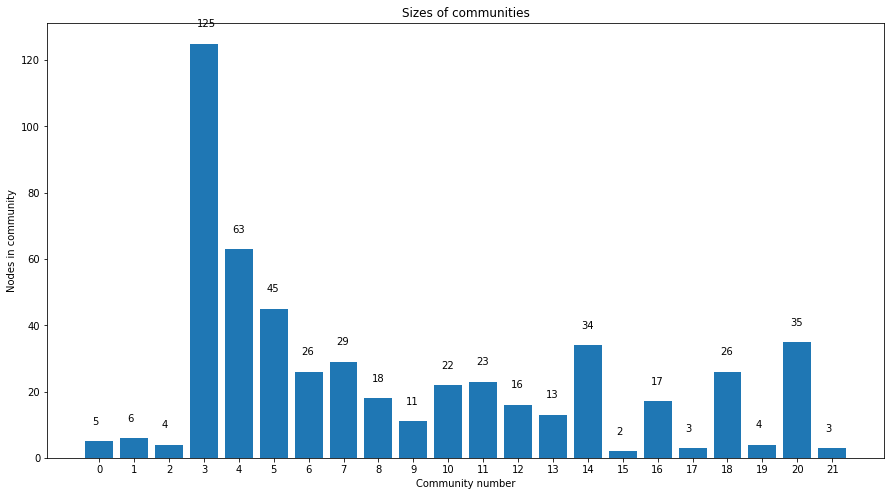

In [42]:
partition_counts = pd.Series(list(communities.values())).value_counts()

# Plot the distributiin of community sized
plt.figure(figsize = (15,8))
plt.bar(partition_counts.index, partition_counts.values)

# Count the nodes in community
for index, value in partition_counts.iteritems():
    plt.text(index-0.2, value+5, value)

    
plt.ylabel('Nodes in community')
plt.xlabel('Community number')
plt.title('Sizes of communities')
plt.xticks(partition_counts.index)

plt.show()

* The figure above shows the sizes all 22 communities. The x-axis represent the community number and the y-axis represent the number of nodes in each community. From the figure, we can see that community number 3 is the larges, with 125 nodes in the community. 

**For the 5 largest communities, create TF-IDF based rankings of words in each community.**

* **There are many ways to calculate TF-IDF, explain how you've done it and motivate your choices.**
* **List the 5 top words for each community according to TF.**
* **List the 5 top words for each community accourding to TF-IDF. Are these words more descriptive of the community than just the TF? Justify your answer.**

Term frequency or TF defines how frequent a term appears in the Wiki-page. This however is not good enough since many terms are repeated across the communities Wiki-page, implying that they are not specific for them. Anoter term, IDF, or the inverse document frequency, is presented to identify specific terms for the communities. This term is based in the frquency of the same term in other communities, and if the word is frequent elsewhere, it lowers the score.

So the formula for our TF-IDF values is:

${\displaystyle f_{t,d}\cdot \log {\frac {N}{n_{t}}}}$

where $f_{t,d}$ is the term frequency (t) in the document (d). N is the total number of documents and $n_t$ is document frequency. [ref: TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)

In [43]:
# Find the top 5 communities
top_5_communities = []
for i in partition_counts.index[:5]:
    top_5_communities.append(community_list[i])

In [65]:
community_list[0]

In [61]:
communities

{'Baddek': 0,
 'Link': 3,
 'Nazbi': 0,
 'Savelle': 0,
 'Yammo': 0,
 'Bamboo': 2,
 'Baumar': 2,
 'Banji': 3,
 'Ena': 3,
 'Hylia': 4,
 'Malanya': 3,
 'Konba': 3,
 'Falmark': 2,
 'Selmie': 2,
 'Bayge': 5,
 'Heehl': 5,
 'Kabetta': 5,
 'Daruk': 5,
 'Beedle': 6,
 'Bolson': 7,
 'Boldon': 7,
 'Hudson': 7,
 'Karson': 3,
 'Brigo': 9,
 'Decayed Guardian': 9,
 'Guardian Stalker': 9,
 'Cambo': 3,
 'Chabi': 10,
 'Bokoblin': 10,
 'Kilton': 11,
 'Blue Bokoblin': 10,
 'Black Bokoblin': 10,
 'Chork': 3,
 'Geggle': 3,
 'Kass': 12,
 'Chumin': 3,
 'Dabi': 13,
 'Epona': 13,
 'Yunobo': 7,
 'Calamity Ganon': 4,
 'Fireblight Ganon': 14,
 'Princess Zelda': 5,
 'Revali': 12,
 'Bludo': 7,
 'Dark Beast Ganon': 5,
 'King Rhoam': 5,
 'Dauntless': 0,
 'Dinraal': 20,
 'Naydra': 20,
 'Farosh': 20,
 'Hestu': 3,
 'Kenyo': 3,
 'Endai': 16,
 'Chuchu': 16,
 'Master Kohga': 5,
 'Fyson': 7,
 'Misa': 7,
 'Rhondson': 7,
 'Greyson': 7,
 'Pelison': 7,
 'Dorill': 7,
 'Jengo': 7,
 'Axyl': 7,
 'Bohrin': 7,
 'Impa': 5,
 'Kapson': 7,


In [63]:
# Clean the text and return a dictionary with all the words in each community
def get_clean_word_list(list_nodes, communities):
    script_path = os.getcwd()
    folder = 'characters_clean_text/'
    path = os.path.join(script_path,folder)
    
    normal_name = []
    comp_name = []
        
    dict_of_community = {}
    for c in communities:
        final_list = []
        for node in c.nodes.keys():
            with open(path + node + '.txt', 'r') as file:
                content = file.read()
            
            pattern = r'\=+[\w\s]+\=+'
            new_line_pattern = r'\\n'
            new_content = re.sub(pattern, '', content)
            new_content = re.sub(new_line_pattern, ' ', content)
    
            # remove composite names
            if ' ' in c:
                comp_name.append(c)
            else:
                normal_name.append(c)
        
            for name in comp_name:
                new_content = new_content.replace(name, "")
        
            # remove tokens
            tk = RegexpTokenizer(r'\w+') # nota þennan tokenizer til þess að geta removeað punktuation á auðveldan hátt
            token_content = tk.tokenize(new_content)
    
            # remove normal names
            words = [word for word in token_content if word not in normal_name]
    
            # remove stop words
            words = [word for word in words if word not in stopwords.words('english')]
    
            # put everything in lower case
            words = [word.lower() for word in words]
            
            wnl = WordNetLemmatizer()
            words = [wnl.lemmatize(word) for word in words]
        
            final_list.extend(words) 
        dict_of_community[node] = final_list
    return dict_of_community

In [64]:
dict_of_community = get_clean_word_list(list_nodes, top_5_communities)

In [55]:
dict_of_community

{'Guardian Scout IV': ['guardian',
  'scout',
  'iv',
  'enemy',
  'breath',
  'wild',
  'characteristic',
  'the',
  'guardian',
  'scout',
  'iv',
  'strongest',
  'variation',
  'guardian',
  'scout',
  'found',
  'within',
  'a',
  'major',
  'test',
  'strength',
  'ancient',
  'shrine',
  'in',
  'order',
  'complete',
  'shrine',
  'link',
  'must',
  'defeat',
  'guardian',
  'scout',
  'iv',
  'inside',
  'being',
  'upgraded',
  'version',
  'guardian',
  'scout',
  'iv',
  'capable',
  'wielding',
  'three',
  'weapon',
  'they',
  'equipped',
  'combination',
  'guardian',
  'sword',
  'guardian',
  'shield',
  'guardian',
  'spear',
  'ancient',
  'battle',
  'axe',
  'location',
  'ancient',
  'shrine',
  'chaas',
  'qeta',
  'shrine',
  'goma',
  'asaagh',
  'shrine',
  'hia',
  'miu',
  'shrine',
  'kema',
  'kosassa',
  'shrine',
  'mozo',
  'shenno',
  'shrine',
  'ruvo',
  'korbah',
  'shrine',
  'tcb',
  'saas',
  'ko',
  'sah',
  'shrine',
  'tena',
  'ko',
  'sah'

In [67]:
# Get a unique list of all the words in dict_of_community
word_list = []
for key, val in dict_of_community.items():
    word_list.extend(val)
unique_word_list = list(set(word_list))

In [70]:
TF_dict

{'she': 0.0,
 'note': 0.0,
 'manages': 0.0,
 'cannot': 0.0,
 'wielding': 0.0,
 'finished': 0.0,
 'within': 0.0,
 'pumpkin': 0.0,
 'sheikah': 0.0,
 'entered': 0.0,
 'settle': 0.0,
 'body': 0.0,
 'leave': 0.0,
 'named': 0.0,
 'selection': 0.0,
 'directs': 0.0,
 'went': 0.0,
 'mozo': 0.0,
 'local': 0.0,
 'moving': 0.0,
 'champion': 0.0,
 'pm': 0.0,
 'serf': 0.0,
 'ko': 0.0,
 'general': 0.0,
 'part': 0.0,
 'beast': 0.023809523809523808,
 'resurrection': 0.0,
 'it': 0.0,
 'complete': 0.0,
 'recently': 0.0,
 'ruta': 0.023809523809523808,
 'halberd': 0.0,
 'beyond': 0.0,
 'share': 0.0,
 'throwing': 0.0,
 'golden': 0.0,
 'molduking': 0.0,
 'sighted': 0.0,
 'when': 0.023809523809523808,
 'bos': 0.0,
 'village': 0.0,
 'known': 0.0,
 'fine': 0.0,
 'heard': 0.0,
 'nima': 0.0,
 'claim': 0.0,
 'however': 0.023809523809523808,
 'in': 0.0,
 'something': 0.0,
 'broadsword': 0.0,
 'ask': 0.0,
 'giant': 0.0,
 'urge': 0.0,
 'sand': 0.0,
 'browsing': 0.0,
 'blessing': 0.0,
 'search': 0.0,
 'order': 0.0,
 '

In [47]:
# Count how many times every word appears in each comminty
TF_dict = {} 
for key, val in dict_of_community.items():
    word_count = []
    for word in unique_word_list:
        count = 0
        for i in val:
            if word == i:
                count += 1
        word_count.append(count)
    TF_dict[key] = word_count

In [48]:
# Calculate the TF for every word
calculate_TF = {}
for key, val in dict_of_community.items():
    for count in TF_dict[key]:
        if key in calculate_TF:
            calculate_TF[key].extend([count/sum(TF_dict[key])])
        else:
            calculate_TF[key] = [count/sum(TF_dict[key])]

In [49]:
# Make a list of five lists containg all the TFs for all the five communities 
TF_list = []
for key, val in calculate_TF.items():
    TF_list.append(val)

In [50]:
# List of five dictionaries (one for each comminty) with all the words and corresponing TF value
list_of_TF_dict = []
for j in range(5):
    TF_dict = {}
    for i, word in enumerate(unique_word_list):
        TF_dict[word] = TF_list[j][i]
    list_of_TF_dict.append(TF_dict)

In [51]:
# Sorted dictionary with the top 5 words for each community
list_of_names = ['Guardian Scout IV', 'Lakna Rokee', 'Trissa', 'Molduking', 'Reagah']
print('The 5 top words for each community according to TF:')
print("")
for i, words in enumerate(list_of_TF_dict):
    sorted_dict = {k: v for k, v in sorted(words.items(), key=lambda item: item[1])}
    print(list_of_names[i],':')
    for key, val in list(sorted_dict.items())[-5:]:
        print(key, val)
    print("")

The 5 top words for each community according to TF:

Guardian Scout IV :
ancient 0.02586206896551724
iv 0.04310344827586207
scout 0.07758620689655173
guardian 0.10344827586206896
shrine 0.10344827586206896

Lakna Rokee :
monk 0.046296296296296294
link 0.046296296296296294
lakna 0.07407407407407407
rokee 0.07407407407407407
shrine 0.07407407407407407

Trissa :
village 0.020618556701030927
also 0.020618556701030927
steen 0.02577319587628866
trissa 0.04639175257731959
link 0.04639175257731959

Molduking :
traysi 0.014634146341463415
link 0.01951219512195122
the 0.024390243902439025
molduga 0.02926829268292683
molduking 0.05853658536585366

Reagah :
originally 0.023809523809523808
abandoning 0.023809523809523808
sidon 0.047619047619047616
reagah 0.07142857142857142
goron 0.07142857142857142



* Here are the top 5 words for the five larges communities according to the TF values, in a descending order. We can see that 'link' appears in three of the communities, which of course makes sense because he is the main character of the game. 

* The top five communities are Guardian Scout IV, Lakna Rokee, Trissa, Molduking, Reagah. When looking at the first community or Guardian Scout IV, we can see that the top 5 words there are reasonable, since it contains words like, 'iv', 'guardian' and 'scout' which is part of the name of the community. The same also applies for other four communities when looking into their name and what they are about.

In [ ]:
dict_of_community_IDF = get_clean_word_list(list_nodes, community_list)

In [ ]:
IDF_list = []
for word in unique_word_list:
    count = 0
    for key, val in dict_of_community_IDF.items():
        if word in val:
            count += 1
    IDF_list.append(count)

In [ ]:
IDF = []
for number in IDF_list:
    for lists in list_of_TF_dict:
        for k, v in lists.items():
            IDF.append(v * (math.log(len(community_list)/(number+1))))

In [ ]:
calculate_IDF = {}
for i, word in enumerate(unique_word_list):
    calculate_IDF[word] = IDF[i]

In [ ]:
print('The 5 top words according to TF-IDF:')
print("")
sorted_dict_IDF = {k: v for k, v in sorted(calculate_IDF.items(), key=lambda item: item[1])}
for key, val in list(sorted_dict_IDF.items())[-5:]:
    print(key, val)
print("")

* Here are listed the calculations for TF-IDF, the top 5 words. The words are derived from all communities and are shown in descending order. We notice that iv is split from the original name, Guardian Scout IV, due to the way the text was cleaned. This indicates that the calculation of TF-IDF (as well as TF) is a good measurement and gives us the opportunities to revisit previous steps.

# Part 4: Sentiment of communities

Analyze the sentiment of the communities (lecture 8). Here, we assume that you've successfully identified communities.  More tips & tricks can be found, if you take a look at Lecture 8's exercises.

A couple of additional instructions you will need below:
* We name each community by its three most connected characters.
* Average the average sentiment of the nodes in each community to find a community level sentiment.

Here's what you need to do (repeat these steps and report your results for **both LabMT and VADER**):
> * Calculate and store sentiment for every character
> * Create a histogram of all character's associated sentiments.
> * What are the 10 characters with happiest and saddest pages?
*
Now, compute the sentiment of communities: 
> * What are the three happiest communities according to the LabMT wordlist approach? What about VADER?
> * What are the three saddest communities according to the LabMT wordlist approach? What about VADER?
> * Create a bar plot showing the average sentiment of each community and add error-bars using the standard deviation for both methods. 
> * Explain the difference between the two methods and compare the results you have obtained above.
> * What is the advantage of using a rule-based method over the dictionary-based approach? 

**Answer:**

**Define the communities and name them**

In [43]:
import community

zelda_undir = gcc.to_undirected()

In [44]:
# 1. DEFINE THE COMMUNITIES
def communities(graph):
    partition = community.best_partition(graph)
    d = collections.defaultdict(list)
    # the community.best_partition function maps nodes to a community number, below we map 
    for com in set(partition.values()):
        for nodes in partition.keys():
            if partition[nodes] == com:
                d[com].append(nodes)
    
    return list(d.values())

In [49]:
communities

<function __main__.communities(graph)>

In [45]:
zelda_communities = communities(zelda_undir)

**Name the communities by the 3 most connected characters**

In [46]:
community_names = [", ".join(sorted([node for node in com], key=lambda x: gcc.degree(x), reverse=True)[:3]) for com in zelda_communities]

In [47]:
community_names

['Baddek, Nazbi, Savelle',
 'Akrah, Garshon, Onya',
 'Baumar, Falmark, Bamboo',
 'Link, Vilia, Darton',
 'Calamity Ganon, Hylia, Kah Mael',
 'Harry (Breath of the Wild), Mary (Breath of the Wild), Monkton',
 'Lizalfos, Stalizalfos, Silver Lizalfos',
 'Ami, Izra, Yolero',
 'Yunobo, Bludo, Bolson',
 'Decayed Guardian, Guardian Stalker, Guardian Turret',
 'Bokoblin, Stalkoblin, Blue Bokoblin',
 'Kilton, Stone Talus, Hinox',
 'Princess Zelda, Daruk, Kass',
 'Epona, Dmitri, Jana',
 'Purah, Impa, Dorian',
 'Fire Keese, Chuchu, Fire Chuchu',
 'Amira, Azu, Nikki',
 'Mipha, Sidon, King Dorephan',
 'Riju, Traysi, Barta',
 'Ashai, Pearle, Perda']

**Average the average sentiment of the nodes in each community to find a community level sentiment**

**Download and store the datasets for happines**

In [50]:
# Download the LabMT words of happines dataset
url = "https://ndownloader.figstatic.com/files/360592"
words_of_happiness = pd.read_csv(url, delimiter="\t", skiprows=3)

In [51]:
# Import VADER sentiments
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

**Use previous function to extract tokenized dictionaries for each character**

In [52]:
# This part is used because the .txt files of the characters contain spaces in between words
normal_name = []
comp_name = []
list_of_names = df_characters['Name'].tolist()
for name in list_of_names:
    if ' ' in name:
        comp_name.append(name)
    else:
        normal_name.append(name)
        
race_list = list(set(df_characters['Name']))

In [53]:
dict_of_chars = get_dict_of_races(df_characters, 'Name')

**Calculate and store sentiment for every character**

In [54]:
def compute_average_sentiment(tokens):

    sentiment = 0.0
    if not len(tokens):
        return sentiment

    avg = np.nan_to_num(words_of_happiness[words_of_happiness["word"].isin(tokens)]["happiness_average"].mean())
    return avg

In [55]:
# The sentiment for each character is given as follows
sentiment_values = {}
for name, val in dict_of_chars.items():
    sentiment_values[name] = compute_average_sentiment(val)

In [56]:
# calculate the average of the average sentiment values
community_average = {}
for i, com in enumerate(zelda_communities):
        community_average[community_names[i]] = np.mean([sentiment_values.get(node, 0.0) for node in com])

<ipython-input-57-7f72e6504449>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


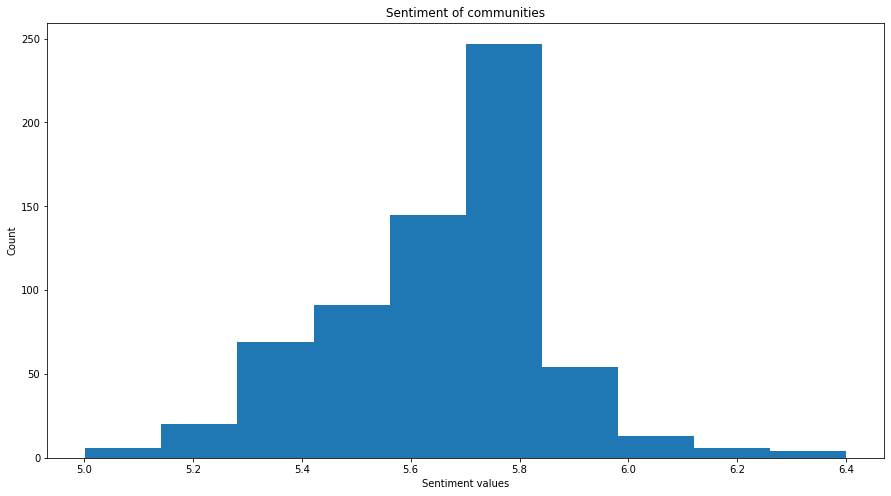

In [57]:
plt.figure(figsize = (15,8))
plt.hist(sentiment_values.values())

plt.title("Sentiment of communities")
plt.ylabel("Count")
plt.xlabel("Sentiment values")
fig.show()

**What are the 10 characters with happiest and saddest pages?**

In [58]:
# Convert dictionary to dataframe
sentiment_df = pd.DataFrame({ key:pd.Series(value) for key, value in sentiment_values.items() }).T
sentiment_df = sentiment_df.sort_values(by=[0])

**Top 10 happiest characters**

In [59]:
sentiment_df.tail(10)

,0
Zooki,6.144444
Kinov,6.226923
Ja Baij,6.248000
Owa Daim,6.248000
Oman Au,6.248000
Keh Namut,6.248000
Keo Ruug,6.320000
Rucco Maag,6.400000
Mezza Lo,6.400000
Ne'ez Yohma,6.400000


**Top 10 saddest characters**

In [60]:
sentiment_df.head(10)

,0
Stone Pebblit,5.002169
Treasure Octorok,5.045400
Blizzrobe,5.056400
Kotta,5.084571
Cursed Lizalfos,5.120769
Electric Chuchu,5.124407
Black Moblin,5.143333
Guardian Scout II,5.151404
Frost Pebblit,5.168395
Fire Chuchu,5.168627


**The same with VADER**

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# The sentiment for each character is given as follows
vader_sentiment_values = {}
for name, val in dict_of_chars.items():
    vader_sentiment_values[name] = analyzer.polarity_scores(' '.join(val)) # vader takes whole strings, not tokens

In [ ]:
# Use only the compound values for evaluation
vader_compound_sentiment_values = {}
for name, val in vader_sentiment_values.items():
    vader_compound_sentiment_values[name] = vader_sentiment_values[name]['compound']

In [ ]:
# calculate the average of the average sentiment values
vader_community_average = {}
for i, com in enumerate(zelda_communities):
        vader_community_average[community_names[i]] = np.mean([vader_compound_sentiment_values.get(node, 0.0) for node in com])

In [ ]:
display(vader_community_average)

In [ ]:
plt.figure(figsize = (15,8))
plt.hist(vader_compound_sentiment_values.values())

plt.title("Sentiment of communities")
plt.ylabel("Count")
plt.xlabel("Sentiment values")
fig.show()

In [ ]:
vader_sentiment_df = pd.DataFrame({ key:pd.Series(value) for key, value in vader_compound_sentiment_values.items() }).T
vader_sentiment_df = vader_sentiment_df.sort_values(by=[0])

**Top 10 happiest characters**

In [ ]:
vader_sentiment_df.tail(10)

**Top 10 saddest characters**

In [ ]:
vader_sentiment_df.head(10)

**The three happiest communities**

In [ ]:
sorted_com = sorted([(com, value) for com, value in community_average.items()], key=lambda x: x[1])
vader_sorted_com = sorted([(com, value) for com, value in vader_community_average.items()], key=lambda x: x[1])

**According to LabMT**

In [ ]:
f"3 happiest communities according to LabMT: {list(reversed(sorted_com[-3:]))}"

**According to VADER**

In [ ]:
f"3 happiest communities according to LabMT: {list(reversed(vader_sorted_com[-3:]))}"

**The three saddest communities**

**According to LabMT**

In [ ]:
display(f"3 saddest communities according to LabMT: {sorted_com[:3]}")

**According to VADER**

In [ ]:
display(f"3 saddest communities according to LabMT: {vader_sorted_com[:3]}")

**Bar plots showing for the average sentiment of each community and error-bars**

In [ ]:
from scipy.stats import sem

In [ ]:
# Figure creation
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(1,2,1)
# creating the bar plot
yerror1 = sem([sentiment_values.get(node, 0.0) for node in com])
plt.bar(list(community_average.keys()), list(community_average.values()), yerr = yerror1, color ='orange')

plt.xticks(list(community_average.keys()), rotation='vertical') 
plt.xlabel("Community names")
plt.ylabel("Avg. sentiment")
plt.title("Average sentiment for LabMT")


plt.subplot(1,2,2)  
# creating the bar plot
yerror2 = sem([vader_compound_sentiment_values.get(node, 0.0) for node in com])
plt.bar(list(vader_community_average.keys()), list(vader_community_average.values()), yerr = yerror2, color ='orange')

plt.xticks(list(vader_community_average.keys()), rotation='vertical') 
plt.xlabel("Community names")
plt.ylabel("Avg. sentiment")
plt.title("Average sentiment for VADER")
plt.show()

**Explain the difference between the two methods and compare the results you have obtained above**

* The two methods used were the LabMT and VADER.
* The LabMT evaluation is based on an evluation of words, using Amazon's Mechanical Turk. These ratings are afterwards used in an algorithm which then calculates the overall happiness rating of the word. <br>
* The VADER library is a more sophisticated tool. It uses matrices to calculate the sentiment of whole sentences (not just tokens), which returns better result in many cases (like negating sentences, eg 'not good'). It also contains evauations for emojis and symbols, which is more precise. Applying the library returnsa a dictionary with four values for each sentence: positive, neutral, negative and compound. The one used in this assignment is the compound score, which is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive).

**What is the advantage of using a rule-based method over the dictionary-based approach?**

* Language is complicated tool which is heavily dependant on the context. Isolating words and evaluating each one seperately, might give us most of the times good results, but in more complicated, larger texts, it might not be able to 'unerstand' the general meaning.

# References

[1] Barabási, A.-L. & Pósfai, M. (2016), Network science , Cambridge University Press , Cambridge . http://networksciencebook.com/chapter/4

[2] Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

[3] Dodds, P. S. (2011, December 7). Temporal Patterns of Happiness and Information in a Global Social Network: Hedonometrics and Twitter. Journals.Plos. https://journals.plos.org/plosone/article?id=10.1371%2Fjournal.pone.0026752

[4] Wikipedia contributors. (2021a, September 10). Modularity (networks). Wikipedia.             https://en.wikipedia.org/wiki/Modularity_(networks)

[5] Wikipedia contributors. (2021, September 18). Tf–idf. Wikipedia. https://en.wikipedia.org/wiki/Tf%E2%80%93idf